# Introduction to scikit-learn

1. Getting the data ready
2. Choose the right estimatior/algorithm
3. Fit the model and use it to make predictions
4. Evaluating model
5. Improve a model
6. Save and load a trained model

### Get the data ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (labels)
y = heart_disease["target"]

### Choose the right model and hyperparameters

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Fit the model to the training data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [20]:
clf.fit(X_train, y_train);

In [21]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [22]:
y_test

3      1
28     1
211    0
237    0
218    0
      ..
253    0
269    0
199    0
45     1
85     1
Name: target, Length: 61, dtype: int64

### Evaluate model

In [23]:
clf.score(X_train, y_train)

1.0

In [24]:
clf.score(X_test, y_test)

0.8688524590163934

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [26]:
confusion_matrix(y_test, y_preds)

array([[25,  7],
       [ 1, 28]])

In [27]:
accuracy_score(y_test, y_preds)

0.8688524590163934

### Improve a model

In [28]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100}")


Trying model with 10 estimators...
Model accuracy on test set: 85.24590163934425
Trying model with 20 estimators...
Model accuracy on test set: 81.9672131147541
Trying model with 30 estimators...
Model accuracy on test set: 85.24590163934425
Trying model with 40 estimators...
Model accuracy on test set: 86.88524590163934
Trying model with 50 estimators...
Model accuracy on test set: 86.88524590163934
Trying model with 60 estimators...
Model accuracy on test set: 86.88524590163934
Trying model with 70 estimators...
Model accuracy on test set: 88.52459016393442
Trying model with 80 estimators...
Model accuracy on test set: 88.52459016393442
Trying model with 90 estimators...
Model accuracy on test set: 85.24590163934425


### Save a model and load it

In [29]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [30]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)


0.8524590163934426

## 1. Getting data ready to be used with ML
1. Split data into features and labels X and y
2. Filling missing values
3. Convert non numerical values to numerical (feature encoding)

In [34]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
# split data into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Convert to numerical

#### PREDICT PRICE

In [37]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [38]:
# split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# build ml model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [40]:
# turn the categorical features to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [42]:
# another method

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [43]:
# refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### Missing values

1. fill them with some value
2. remove the sample with missing values

In [46]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
# how many missing values there are
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [52]:
car_sales_missing.dropna(inplace=True)

In [53]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [57]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

### Fill missing values with scikit-learn

In [59]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [61]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


In [64]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with `missing`` and numerical values with mean
car_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
car_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer(
    [
        ("car_imputer", car_imputer, car_features),
        ("door_imputer", door_imputer, door_feature),
        ("num_imputer", num_imputer, num_features)
    ]
)


filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [81]:
car_sales_filled_train = pd.DataFrame(
    filled_X_train,
    columns=["Make", "Colour", "Doors", "Odometer (KM)"]
)
car_sales_filled_test = pd.DataFrame(
    filled_X_test,
    columns=["Make", "Colour", "Doors", "Odometer (KM)"]
)

In [82]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                one_hot, 
                                categorical_features)],
                                remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [84]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## Choose the right estimator/algorithm

* Classification problem - predicting a category
* Regression problem - predicting a number

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [9]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
housing_df = housing_df.drop("MedHouseVal", axis=1)

KeyError: "['MedHouseVal'] not found in axis"

In [94]:
from sklearn.linear_model import Ridge

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.5758549611440128

In [97]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8066196804802649

### Classification problem


In [98]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/home/alexandru/Proiecte/machine-learning/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [101]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [105]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

## Fitting a model and use it to make predictions

### Fitting the model

In [106]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the data
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [107]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


What fit means?

It means that the model goes thorugh each sample and learns what 0 or 1 means. (the target variable in this case can be 0 or 1)

### Make predictions using a machine learning model

In [109]:
# use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [110]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [111]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

### Make predictions with predict_proba()

* returns probability estimates of the classification label
* example: first sample has a probability of x% to be categorized as 1 vs (100 - x)% for 0 

In [112]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [113]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### Make predictions for regression problems

In [114]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [115]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

y_preds = model.predict(X_test)


In [116]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [117]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

## Evaluating a model

1. builtin score() method
2. scoring parameter
3. metric functions

Classification

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [4]:
clf.score(X_train, y_train)

1.0

In [7]:
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
clf.predict(X_test)

Regression 

In [15]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# the default score evaluation metric is r squared for regression algorithms
model.score(X_test, y_test)

0.8066196804802649

In [18]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [21]:
y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

## Cross validation

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
clf.score(X_test, y_test)

0.8524590163934426

In [25]:
cross_val_score(clf, X, y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [26]:
np.random.seed(42)
clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### Accuracy

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

# accuracy by default
cross_val = cross_val_score(clf, X, y, cv=5)

In [31]:
np.mean(cross_val)

0.8248087431693989

### Area under ROC curve

* receiver operating characteristic curve
* area under curve (AUC)
* ROC curves = comparison of a model TP rate vs FP rate

* TP = model predicts 1 when truth is 1
* FP = model predicts 1 when truth is 0
* TN = model predicts 0 when truth is 0
* FN = model predicts 0 when truth is 1

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [36]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [38]:
# calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

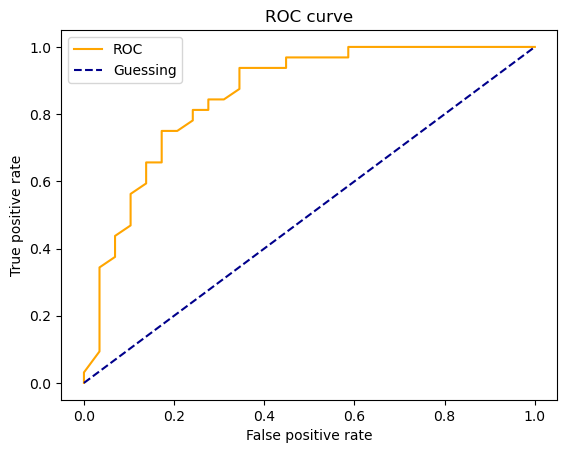

In [39]:
# create function to plot ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

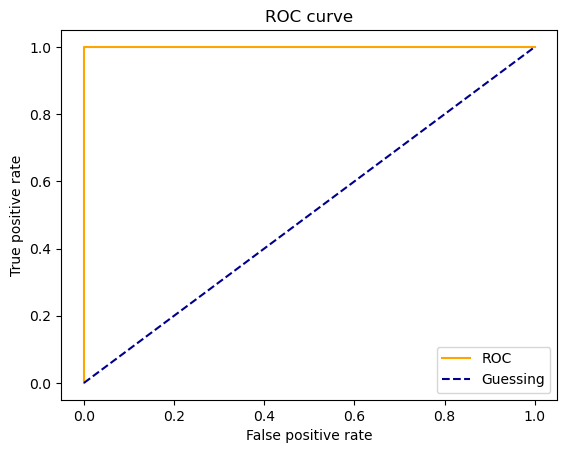

In [41]:
# plot perfect roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

### Confusion matrix

* compares the labels a model predict and the actual labels it was supposed to predict
* gives an idea where the model is getting confused

In [42]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]])

In [43]:
pd.crosstab(y_test, y_preds, rownames=["Actual label"], colnames=["Predictive labels"])

Predictive labels,0,1
Actual label,,
0,24,5
1,8,24


<Axes: >

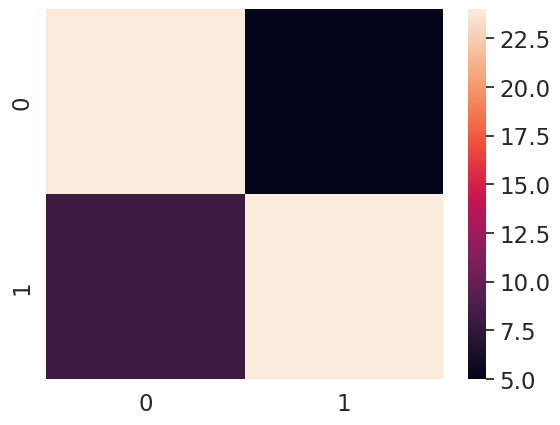

In [45]:
# from y_test -> how many TP, TN, FP, FN are

# make confusion matrix more visible with seaborn
import seaborn as sns

sns.set(font_scale=1.5)
conf_matrix = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_matrix)


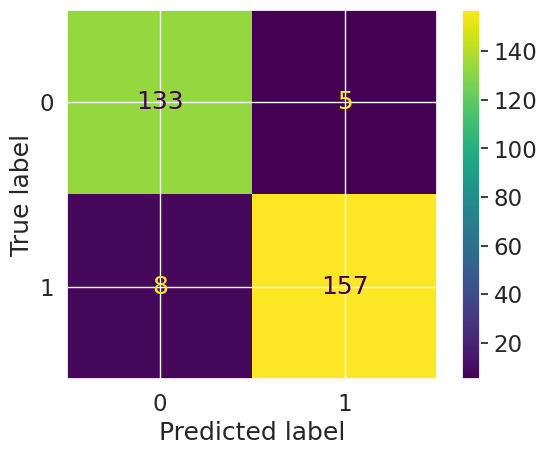

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

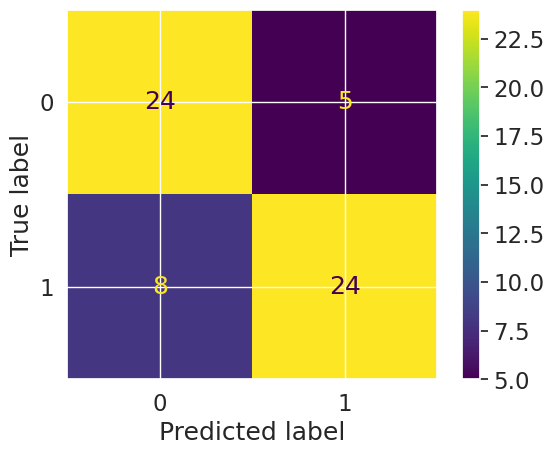

In [47]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

### Classification report

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [51]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/home/alexandru/Proiecte/machine-learning/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandru/Proiecte/machine-learning/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandru/Proiecte/machine-learning/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Regression metrics

### R squared or coeff of determination

In [52]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
model.score(X_test, y_test)

0.8066196804802649

In [54]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [55]:
# Variance = measure of the average degree to which each number is different to the mean
# r2 total variance explained by the model / total variance

r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [56]:
y_preds = model.predict(X_test)
r2_score(y_true=y_test, y_pred=y_preds)

0.8066196804802649

### Mean absolute error

 MAE is the average of the abs differences between predictions and actual values.

 How wrong model predictions are?

In [57]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [61]:
df = pd.DataFrame(data={"actual values": y_test, "pred values": y_preds})
df["diffs"] = np.abs(df["pred values"] - df["actual values"])
df["diffs"].mean()

0.3265721842781009

### Mean squared error

MSE is the mean of the square of the differences between actual and predicted.

Amplifies outliers

In [62]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [63]:
df["squared-diff"] = np.square(df["diffs"])
df.head()

,actual values,pred values,diffs,squared-diff
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [65]:
squared_mean = np.square(df["diffs"]).mean()
squared_mean

0.2534073069137548

Evaluation using `scoring` param

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [68]:
np.random.seed(42)

# default metric for scoring is accuracy (for classification)
# cross validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [70]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_acc 

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [71]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_acc

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

Scoring param for regression

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [77]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.51682354, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [78]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.51906307, -0.34788294, -0.37112854, -0.44980156, -0.4626866 ])

In [79]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.54255936, -0.40903449, -0.43716367, -0.46911343, -0.47319069])

## Evaluate models using scikit metrics

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

In [83]:
print("acc: ", accuracy_score(y_test, y_preds))
print("prec:", precision_score(y_test, y_preds))
print("recall:", recall_score(y_test, y_preds))

acc:  0.8524590163934426
prec: 0.8484848484848485
recall: 0.875


# Improving a model

### Data perspective
* could we collect more data?
* could we improve our data? (more info, more features)

### Model perspective
* is there a better model we could use?
* could we improve current model?

* first prediction = baseline predictions
* first model = baseline model

In [84]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [86]:
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2),
    }
    return metric_dict

### Adjusting hyperparams:
* by hand
* randomly with RandomSearchCV
* exhaustively with GridSearchCV

#### Tunning hyperparams by hand

In [87]:
# 3 split: training, validation, testing
# tunnig on validation split
# evaluation on testing split

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)


(212, 45, 46)

In [102]:
np.random.seed(42)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_valid)

# make baseline predictions
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [109]:
np.random.seed(42)

# create a second classifier with diff hyperparams

clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_2.fit(X_train, y_train)
y_preds = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds)
clf_2_metrics

{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

#### Tunning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# setup randomized search cv
# 10 * 5 fits: 10 iters 5 times cross validated
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid,
                            n_iter=10, # number of combinations to try
                            cv=5,
                            verbose=2)

# fit the randomized search
rs_clf.fit(X_train, y_train);

In [111]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [112]:
# Make predictions with the best hyperparams
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

#### Tunning with GridSearchCV

* goes through each combination from the grid

In [113]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [114]:
grid_2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]
}

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# setup grid search cv
gs_clf = GridSearchCV(
    estimator=clf, 
    param_grid=grid_2,
    cv=5,
    verbose=2
)

# fit the grid search
gs_clf.fit(X_train, y_train);

In [118]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [119]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# Save and load a model

### Pickle

In [121]:
# Save an existing model
import pickle
pickle.dump(gs_clf, open("gs_random_forest_model.pkl", "wb"))


In [123]:
# load a model
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl", "rb"))

In [124]:
gs_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, gs_y_preds)


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Joblib

* provides lightweight pipelining

In [125]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forest.joblib")

['gs_random_forest.joblib']

In [126]:
loaded_joblib_model = load(filename="gs_random_forest.joblib")

In [127]:
gs_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, gs_y_preds)

{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# Summary

In [129]:
# 1. fill missing data
# 2. convert data to numbers
# 3. build a model

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np


data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset="Price", inplace=True)

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4)),
])

numerical_features = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numerical_transformer, numerical_features)
    ]
)

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21485415728584611

In [ ]:
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

In [131]:
gs_model.score(X_test, y_test)

0.3703488954294486